In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

In [2]:
df=pd.read_csv("bank.csv", na_values=["NA"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


## Data Pre-Processing

In [9]:
t_df=df

In [14]:

# Sample categorical data
data = ["cat", "dog", "fish", "dog", "cat"]

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_data = label_encoder.fit(data)
encoded_data1=label_encoder.transform(data)

print(encoded_data)
print(encoded_data1)

'''Fit: In the "fit" part of the operation, the label encoder examines the unique categories (labels) in the categorical feature you want to encode. 
It identifies all the unique categories in the data and assigns a unique numerical label to each category. 
The label encoder builds a mapping between the original categories and their corresponding numerical labels. This mapping is stored in the label encoder's internal state.

Transform: After the "fit" part is complete, you can use the "transform" part of the operation. 
This step takes your original categorical data and replaces each category with its corresponding numerical label, based on the mapping learned during the "fit" phase. 
The transformed data is now in a numerical format, suitable for use with machine learning algorithms that expect numerical input.

'''


LabelEncoder()
[0 1 2 1 0]


'Fit: In the "fit" part of the operation, the label encoder examines the unique categories (labels) in the categorical feature you want to encode. \nIt identifies all the unique categories in the data and assigns a unique numerical label to each category. \nThe label encoder builds a mapping between the original categories and their corresponding numerical labels. This mapping is stored in the label encoder\'s internal state.\n\nTransform: After the "fit" part is complete, you can use the "transform" part of the operation. \nThis step takes your original categorical data and replaces each category with its corresponding numerical label, based on the mapping learned during the "fit" phase. \nThe transformed data is now in a numerical format, suitable for use with machine learning algorithms that expect numerical input.\n\n'

In [13]:
def preprocessor(df):
    res_df=df.copy()
    le=LabelEncoder()
    
    res_df['job']=le.fit_transform(res_df.job)
    res_df['marital']=le.fit_transform(res_df.marital)
    res_df["education"]=le.fit_transform(res_df['education'])
    res_df["default"]=le.fit_transform(res_df['default'])
    res_df["housing"]=le.fit_transform(res_df['housing'])    
    res_df["month"]=le.fit_transform(res_df['month'])    
    res_df["loan"]=le.fit_transform(res_df['loan'])    
    res_df["contact"]=le.fit_transform(res_df['contact'])    
    res_df["poutcome"]=le.fit_transform(res_df['poutcome'])    
    res_df["day_of_week"]=le.fit_transform(res_df['day'])
    res_df["deposit"]=le.fit_transform(res_df['deposit'])
    return res_df

data manipulation libraries like NumPy and Pandas, the .values attribute is used to extract the values from a data structure, such as a Pandas DataFrame or Series, and return them as a NumPy array. 

Pandas DataFrame: When you apply the .values attribute to a Pandas DataFrame, it extracts the underlying data as a NumPy array. This can be useful if you want to work with the data as a NumPy array, which is often more efficient for numerical computations.

Pandas Series: Similarly, when you apply the .values attribute to a Pandas Series, it extracts the data from the Series as a NumPy array.

By converting data from a Pandas DataFrame or Series into a NumPy array, you gain access to the array's powerful numerical computation capabilities and can perform operations more efficiently. It's worth noting that, in recent versions of Pandas, the .to_numpy() method is recommended for explicitly converting data to NumPy arrays, but .values is still widely used and supported.

In [16]:
#example of .values in df
import pandas as pd

# Create a Pandas DataFrame
data = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Extract the values as a NumPy array
values_array = data.values
values_array

array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int64)

In [18]:
#example of .values in series

import pandas as pd

# Create a Pandas Series
series = pd.Series([1, 2, 3, 4, 5])

# Extract the values as a NumPy array
values_array = series.values
values_array

array([1, 2, 3, 4, 5], dtype=int64)

In [28]:
t_df.head()

encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,4


In [27]:
#encoding
encoded_df=preprocessor(t_df)

x=encoded_df.drop(['deposit'],axis=1).values#independent variable
y= encoded_df['deposit'].values#dependent variable

## split the data into Train-Test

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

## Build the decision tree model

In [30]:
#decision tree with depth 2
model_dt_2=DecisionTreeClassifier(random_state=1,max_depth=2)
model_dt_2.fit(xtrain,ytrain)
model_dt_2_tscore=model_dt_2.score(xtrain,ytrain)#returns accuracy
print("Training score: ",model_dt_2_tscore)
model_dt_2_pscore=model_dt_2.score(xtest,ytest)
print("Testing score: ",model_dt_2_pscore)

Training score:  0.7084779930563333
Testing score:  0.7223466188983431


In [32]:
y_pred=model_dt_2.predict(xtest)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [34]:
#decision tree with depth 4
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(xtrain,ytrain)
model_dt_4_tscore=model_dt_4.score(xtrain,ytrain)
model_dt_4_pscore=model_dt_4.score(xtest,ytest)
print("Training score ",model_dt_4_tscore)
print("Testing score ",model_dt_4_pscore)

Training score  0.7906820472617314
Testing score  0.8042991491267353


In [75]:
#decision tree
model_c=DecisionTreeClassifier(random_state=1,max_depth=8,min_samples_split=100,min_samples_leaf=10,criterion="gini")
model_c.fit(xtrain,ytrain)
print("train  ",model_c.score(xtrain,ytrain))
print("test  ",model_c.score(xtest,ytest))
y_predict=model_c.predict(xtest)

train   0.833351999104043
test   0.8298253470667264


In [88]:
modele=DecisionTreeClassifier(random_state=1,max_depth=8,criterion="entropy")
modele.fit(xtrain,ytrain)
print("train ",modele.score(xtrain,ytrain))
print("test ",modele.score(xtest,ytest))
y_p=modele.predict(xtest)

train  0.8558629185799081
test  0.8293775190326914


## Performance metrics

In [79]:
fpr,tpr,_=roc_curve(ytest,y_predict)
roc_auc=auc(fpr,tpr)

'''
roc_curve(
    y_true,
    y_score,
    *,
    pos_label=None,
    sample_weight=None,
    drop_intermediate=True,
)
Returns
-------
fpr : ndarray of shape (>2,)
    Increasing false positive rates such that element i is the false
    positive rate of predictions with score >= `thresholds[i]`.

tpr : ndarray of shape (>2,)
    Increasing true positive rates such that element `i` is the true
    positive rate of predictions with score >= `thresholds[i]`.

thresholds : ndarray of shape (n_thresholds,)
    Decreasing thresholds on the decision function used to compute
    fpr and tpr. `thresholds[0]` represents no instances being predicted
    and is arbitrarily set to `np.inf`.
    
    
    
 auc(x, y)    
x : array-like of shape (n,)
    X coordinates. These must be either monotonic increasing or monotonic
    decreasing.
y : array-like of shape (n,)
    Y coordinates.
    
    
Returns
-------
auc : float
    Area Under the Curve.


'''

In [82]:
y_actual=None
for i in range(len(y_predict)):
    if(y_predict[i]==1):
        y_actual=np.vstack((y_actual,ytest[i]))

In [83]:
#recall
y_actual=y_actual.flatten()
count=0
for result in y_actual:
    if(result==1):
        count+=1
        
print("true yes/ predicted yes: ")
print(count/float(len(y_actual)))

true yes/ predicted yes: 
0.796875


In [84]:
y_actual

array([None, 1, 1, ..., 1, 1, 1], dtype=object)

## Area under the curve

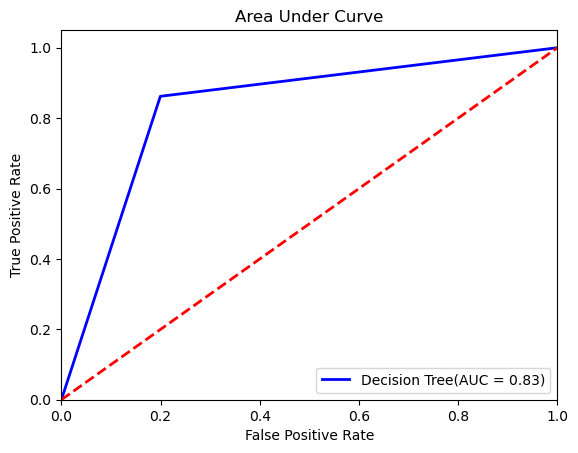

In [87]:
plt.figure(1)
lw=2#line width
plt.plot(fpr,tpr,color='blue',lw=2,label='Decision Tree(AUC = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color="red",lw=lw,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc='lower right')
plt.show()

In [90]:
# y_actual=None
for i in range(len(y_p)):
    if(y_p[i]==1):
        y_actual=np.vstack((y_actual,ytest[i]))

In [91]:
#recall
y_actual=y_actual.flatten()
count=0
for result in y_actual:
    if(result==1):
        count+=1
        
print("true yes/ predicted yes: ")
print(count/float(len(y_actual)))

true yes/ predicted yes: 
0.8162887552059231


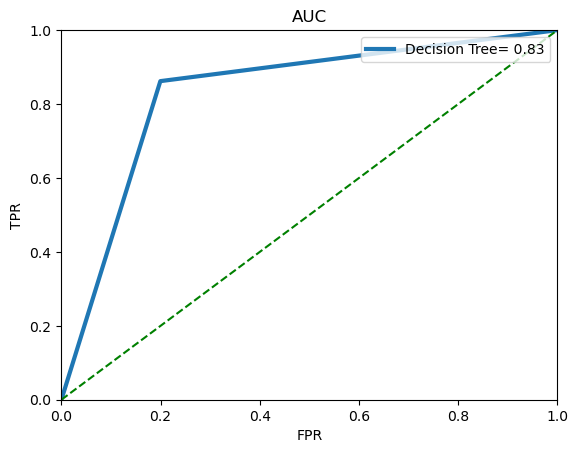

In [93]:
plt.figure(1)
plt.plot(fpr,tpr,lw=3,label="Decision Tree= %.2f"% roc_auc)
plt.plot([0,1],[0,1],linestyle="--",color="green")
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title("AUC")
plt.legend(loc="upper right")

## Confusion matrix

In [98]:
print(confusion_matrix(ytest,y_predict))

[[935 233]
 [147 918]]


In [99]:
accuracy_score(ytest,y_predict)

0.8298253470667264

In [102]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion(model,normalize=False):
    cm=confusion_matrix(ytest,model,labels=[0,1])
    classes=["success","default"]
    cmap=plt.cm.Blues
    title='Confusion Matrix'
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm=np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j], horizontalalignment='center',color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

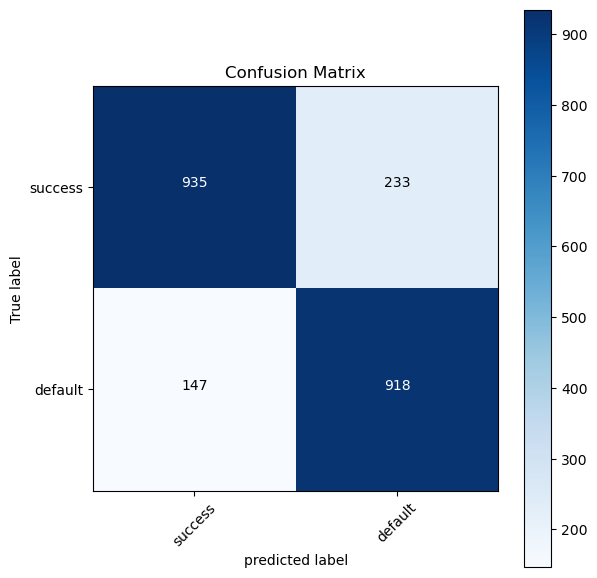

In [103]:
plt.figure(figsize=(6,6))
plot_confusion(y_predict,normalize=False)
plt.show()